# casual inference

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from causalml.inference.tf import DragonNet
from causalml.metrics import regression_metrics
import matplotlib.pyplot as plt

# Load and clean the dataset
dfP = pd.read_csv("C:/Users/User/Documents/GitHub/Health-impacts-of-air-pollution/MortData/GertPollMort30.csv", sep=';', header=0, index_col=0, parse_dates=True)

# Drop rows with any NaN values
df = dfP.dropna()

# Assign binary treatment based on conditions
df['treatment'] = np.where((df['pm2.5'] > 40) & (df['pm10'] > 75), 1, 0)

# Separate target variable (mortality) and use everything else as features
y = df['death_count']
treatment = df['treatment']
X = df.drop(columns=['death_count', 'treatment'])


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Convert data to appropriate types
X_scaled = X_scaled.astype(np.float32)
treatment = treatment.astype(np.float32)
y = y.astype(np.float32)


# Print data types to verify
print(X_scaled.dtype, treatment.dtype, y.dtype)

# Initialize the DragonNet model
dragonnet = DragonNet()

# Fit the model on the training data
dragonnet.fit(X_scaled, treatment, y)

# Predict treatment effects on the test set
treatment_effects = dragonnet.predict(X_scaled)

# Print the average treatment effect (ATE)
#ate = treatment_effects[:, 2].mean()
#print(f"Average Treatment Effect (ATE): {ate}")

#Here, you are calling .mean() directly on the entire treatment_effects array, which includes both columns. This can be misleading.
# To get the actual ATE as 𝜇1−𝜇0  , you need to subtract the two columns:
mu0 = treatment_effects[:, 0]
mu1 = treatment_effects[:, 1]
ite = mu1 - mu0  # Individual Treatment Effect for each sample
ates = ite.mean()
print("Average Treatment Effect (ATE):", ates)
# Otherwise, treatment_effects.mean() lumps together  𝜇1−𝜇0, which is not the difference.


C:\Users\User\anaconda3\envs\MyChatBot\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\AppData\Local\Temp\ipykernel_3040\166288843.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['treatment'] = np.where((df['pm2.5'] > 40) & (df['pm10'] > 75), 1, 0)


float32 float32 float32

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - binary_classification_loss: 36.9608 - loss: 4107.6050 - regression_loss: 2021.6562 - track_epsilon: 0.0295 - treatment_accuracy: 0.6899 - val_binary_classification_loss: 22.3268 - val_loss: 1140.2634 - val_regression_loss: 541.0226 - val_track_epsilon: 0.0125 - val_treatment_accuracy: 0.8418 - learning_rate: 0.0010
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - binary_classification_loss: 15.3737 - loss: 1121.4464 - regression_loss: 550.4997 - track_epsilon: 0.0119 - treatment_accuracy: 0.9394 - val_binary_classification_loss: 11.4661 - val_loss: 1225.4054 - val_regression_loss: 581.2789 - val_track_epsilon: 0.0108 - val_treatment_accuracy: 0.9519 - learning_rate: 0.0010
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_classification_loss: 11.0830 - loss: 1049.4806 - regression_loss: 516.6603 - track_epsilon: 0.0106 - treatment_accuracy: 0.9510 - val_binary_classification_loss: 10.1994 - val

C:\Users\User\AppData\Local\Temp\ipykernel_3040\4175622965.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop=legend_properties)


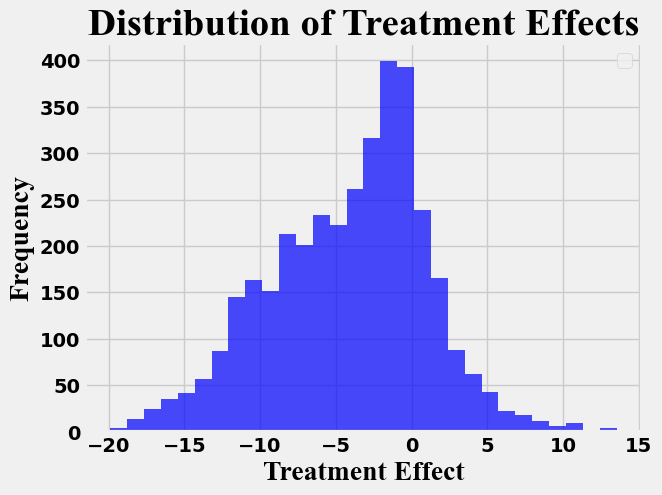

In [2]:
from matplotlib import rcParams
rcParams['font.weight'] = 'bold'

# Plot histogram of treatment effects
plt.hist(ite, bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Treatment Effects', fontname="Times New Roman", size=28,fontweight="bold")
plt.xlabel('Treatment Effect', fontname="Times New Roman", size=20,fontweight="bold")
plt.ylabel('Frequency', fontname="Times New Roman", size=20,fontweight="bold")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

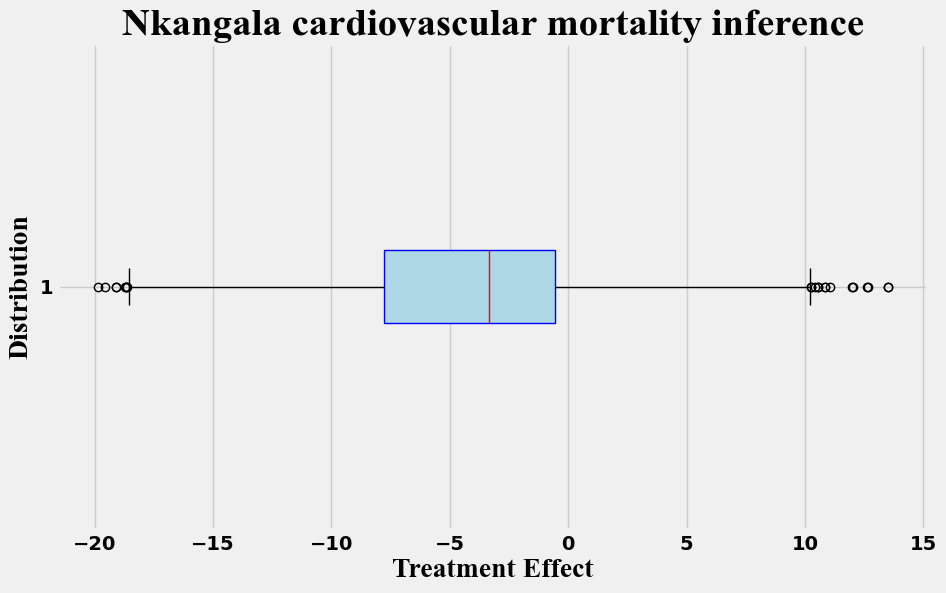

In [3]:
from matplotlib import rcParams
rcParams['font.weight'] = 'bold'

# Assuming treatment_effects is already defined and contains the treatment effects
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(ite, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

# Add titles and labels
plt.title('Nkangala cardiovascular mortality inference', fontname="Times New Roman", size=28,fontweight="bold")
plt.xlabel('Treatment Effect', fontname="Times New Roman", size=20,fontweight="bold")
plt.ylabel('Distribution', fontname="Times New Roman", size=20,fontweight="bold")

# Show the plot
plt.show()